# CIFAR-10 을 이용한 CNN 구축

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9457138620691686924, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3196895232
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5762574684738067677
 physical_device_desc: "device: 0, name: Quadro M1200, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [6]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

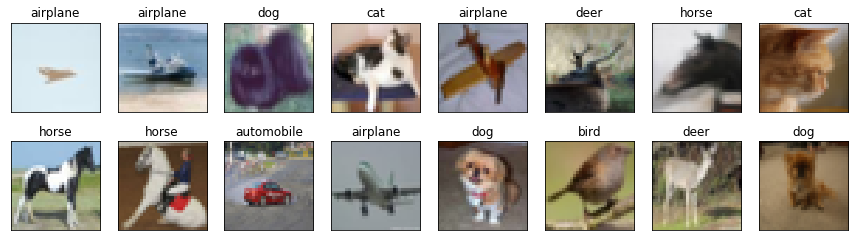

In [7]:
# visualization of cifar10 images
fig = plt.figure(figsize=(15, 4))
for i in range(1, 17):
    idx = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(2, 8, i)
    ax.imshow(X_train[idx, :])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(cifa10_classes[y_train[idx, 0]])

In [8]:
# data normalization
X_train = X_train / 255.
X_test  = X_test / 255.

In [9]:
# one-hot encoding of class labels
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [10]:
# model build
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
__________

In [12]:
# model compile
adam_optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), verbose=1, shuffle=True)

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
50000/50000 [==============================] - 15s 303us/sample - loss: 1.6730 - acc: 0.3829 - val_loss: 1.4000 - val_acc: 0.4920
Epoch 2/20
50000/50000 [==============================] - 13s 269us/sample - loss: 1.3426 - acc: 0.5181 - val_loss: 1.1167 - val_acc: 0.6019
Epoch 3/20
50000/50000 [==============================] - 14s 276us/sample - loss: 1.1880 - acc: 0.5753 - val_loss: 1.0208 - val_acc: 0.6392
Epoch 4/20
50000/50000 [==============================] - 14s 286us/sample - loss: 1.1108 - acc: 0.6066 - val_loss: 0.9408 - val_acc: 0.6728
Epoch 5/20
50000/50000 [==============================] - 14s 286us/sample - loss: 1.0455 - acc: 0.6306 - val_loss: 0.9141 - val_acc: 0.6764
Epoch 6/20
50000/50000 [==============================] - 14s 288us/sample - loss: 1.0027 - acc: 0.6464 - val_loss: 0.8793 - val_acc: 0.6916
Epoch 7/20
50000/50000 [==============================] 

In [14]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 106us/sample - loss: 0.7123 - acc: 0.7527


[0.7122933663368225, 0.7527]

In [15]:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

In [16]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [17]:
y_true_classes = np.argmax(y_test, axis=1)
y_true_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

### accuracy 시각화

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_true_classes, y_pred_classes)

array([[726,  20,  56,  18,  23,   4,   9,   6,  95,  43],
       [ 10, 867,   1,   5,   1,   1,  11,   2,  19,  83],
       [ 57,   3, 654,  31,  90,  53,  79,  15,  15,   3],
       [ 18,   4,  79, 497,  87, 163, 100,  22,  15,  15],
       [ 10,   1,  72,  33, 762,  16,  50,  46,   9,   1],
       [  8,   1,  64, 120,  56, 684,  27,  32,   1,   7],
       [  5,   1,  34,  19,  45,  13, 871,   3,   7,   2],
       [ 11,   1,  38,  25,  84,  69,  13, 746,   3,  10],
       [ 34,  19,  12,  10,   7,   5,   8,   5, 881,  19],
       [ 23,  59,   7,  10,   8,   8,   7,  11,  28, 839]], dtype=int64)

Test Accuracy : 0.7527


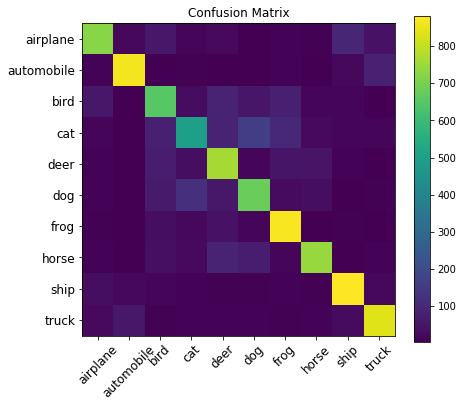

In [19]:
plt.figure(figsize=(7,6))
plt.imshow(confusion_matrix(y_true_classes, y_pred_classes))
plt.colorbar()
plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, fontsize=12)
plt.title('Confusion Matrix')

print('Test Accuracy :', accuracy_score(y_true_classes, y_pred_classes))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교